# Problem Statment

# Sentiment analysis - Twitter dataset

In [1]:
# !pip install spacy --upgrade

In [2]:
# !python -m spacy download en_core_web_sm

In [3]:
import spacy
import en_core_web_sm
import pandas as pd
import numpy as np
import re # regular expression package by default available in python
import random

# importing the dataset

In [4]:
train_data = pd.read_csv('train.csv')
train_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
train_data = pd.read_csv('train.csv', header = None,
                        names = ['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding ='latin1') 
# giving own names to the columns for names = ['sentiment', ....... etc]
# by default all files are in 'utf' format, but this file is in 'latin1' format. So, we have to mention specifically.

In [6]:
train_data

# unwanted columns like id, date, query etc not to be used for the training& testing 

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
train_data['sentiment'].unique()

array([0, 4], dtype=int64)

In [8]:
np.unique(train_data['sentiment'], return_counts=True)

(array([0, 4], dtype=int64), array([800000, 800000], dtype=int64))

In [9]:
# removed unwanted columns from the dataset
train_data = train_data.drop(['id', 'date', 'query', 'user'], axis=1)
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


# Train and Test data

In [10]:
x= train_data.iloc[:,1].values  # all rows, 1st column values alone
y= train_data.iloc[:,0].values  # all rows, 0th column values

# Splitting train and test data

In [11]:
from sklearn.model_selection import train_test_split
x, _, y, _ = train_test_split(x,y, test_size= 0.97)  # onlt 3% of data has been taken from actual dataset due to heady dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2) # from the above 3% dataset, 20% for traain & 80% for test

In [12]:
x_train.shape, y_train.shape

((38400,), (38400,))

In [13]:
x_test.shape, y_test.shape

((9600,), (9600,))

# Preprocessing the data

In [14]:
nlp = spacy.load('en_core_web_sm')
nlp

In [18]:
# custom function for removing unwanted texts from the data

def preprocessing(sentence):
    sentence = sentence.lower()
    sentence = re.sub(r'@[A-Za-z0-9]+', ' ', sentence) 
    
    # removes words next to @   
    # .sub is for replament operation
    # + for any numbers coming further after that A-Za-z0-9
    # '' for converting above letter/ number into blank spaces
    
    sentence = re.sub(r'https?://[A-Za-z0-9]', ' ', sentence) 
    # removes unwanted website links
    # ? is for optional in case of http/ https in some cases
    
    
    sentence = sentence.replace('.', '') # replace the . values into '' ie. empty values
    
    tokens = []
    
    tokens = [token.text for token in nlp(sentence)
             if not (token.is_stop
                    or token.like_num
                    or token.is_punct
                    or token.is_space
                    or len(token) == 1)]
    tokens = ' '.join([element for element in tokens])
    
    return tokens

In [20]:
preprocessing('@nielitchennai http://nielit.edu.in/ - open from 9am t 6 pm')

'ieliteduin/ open pm'

In [21]:
x_train_cleaned =[preprocessing(tweet) for tweet in x_train] # excellent!. one function cleaning the wole data at once

In [22]:
x_test_cleaned = [preprocessing(tweet) for tweet in x_test]

In [23]:
len(x_train_cleaned)

38400

In [24]:
len(x_test_cleaned)

9600

In [31]:
# checking 10 values randomly in between the range of 0 to -1

for _ in range(10):
    print(x_train_cleaned[random.randint(0, len(x_train_cleaned)-1)])

ice cubes melt cute
pissed bcus nt able find wearso stayin home tonite
going bed got alot accomplished sooooo
sounds fun day youwhat boys talk
sitting inside rain ruined plan walk oh ireland
moulin rouge mad cry
oh fun stweet soon
roster making happy right
sleep ok need prepare surgical jigsaw
yup getting things rolling


# Sentiment Analysis with NLTK package

In [47]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91807\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [39]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [42]:
# randomly checking sentences whether negative, neutral or positive

nltk_classifier = SentimentIntensityAnalyzer()
nltk_classifier.polarity_scores('I love this food')

{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}

In [45]:
nltk_classifier.polarity_scores(' I hate this food')

{'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719}

In [46]:
nltk_classifier.polarity_scores(' I have this food')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [52]:
# pasing each sentence to the nltk_classifier.polarity_scores(sentence)
for sentence in x_test:
    print(nltk_classifier.polarity_scores(sentence), ' - ', sentence)

{'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'compound': -0.0772}  -  I guess just waiting around..... sorry 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  @Screenjabber Couldn't stand it, to me that wasn't red dwarf 
{'neg': 0.335, 'neu': 0.52, 'pos': 0.146, 'compound': -0.5634}  -  Everytime I eat Taco Bell, I wake up so sick  guess I should stop huh? Lol
{'neg': 0.0, 'neu': 0.569, 'pos': 0.431, 'compound': 0.6486}  -  @JohnhampsonUK  Trying to attract you over here mate lol 
{'neg': 0.123, 'neu': 0.877, 'pos': 0.0, 'compound': -0.308}  -  @khuranakaran and a donation campaign sounds good.. only if it could work!  not sure baout SCAD reviews though
{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6114}  -  @whitro6060 happy birthday! 
{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}  -  @NBATVAndre Z should stay with the Cavs. Hope they get the Diesel -- a big man they are so in need of... 
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  time for w

# Sentiment analysis with TF-IDF (Term Frequency - Inverse Document Frequency)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train_cleaned)

In [73]:
x_train_tfidf.shape

(38400, 35178)

In [76]:
len(vectorizer.get_feature_names())

35178

In [77]:
def preprocessing_lemma(sentence):
    tokens = []
    tokens = [token.lemma_ for token in nlp(sentence)]
    tokens = ' '.join([element for element in tokens])
    
    return tokens

In [78]:
preprocessing_lemma('learn learned learning')

'learn learn learn'

In [79]:
x_train_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in x_train_cleaned]

In [81]:
vectorizer = TfidfVectorizer()
x_train_tfidf = vectorizer.fit_transform(x_train_cleaned_lemma)

In [82]:
x_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in x_test_cleaned]

In [84]:
x_test_tfidf = vectorizer.transform(x_test_cleaned_lemma)

In [85]:
x_train_tfidf.shape

(38400, 31778)

In [86]:
x_test_tfidf.shape

(9600, 31778)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train_tfidf, y_train)

DecisionTreeClassifier()

In [94]:
y_pred = classifier.predict(x_test_tfidf)

In [95]:
y_pred.shape

(9600,)

In [96]:
y_test.shape

(9600,)

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test, y_pred)*100,'%')

print(confusion_matrix(y_test, y_pred))

67.42708333333334 %
[[3326 1395]
 [1732 3147]]


# 
# Word Cloud 
# Bonus (optional) 

In [102]:
texts = ''
for text in x_train_cleaned:
    texts += ' ' + text

In [103]:
texts

" like logo waffle house love egg drop soup earlier morning time actually good messed directions oops comoing drink enougj ull understand soanish songs sayin lmao misss puto maricon thanks hoping find job hotel years help long ppl hiring marty costs â£10 features tuesday friday blache sorry fun glitttah eyeliner need trip wally world fridge lacking celebs banned hairstyle quot;blue green&quot quot;it entered mind&quot hug benjamin button good moie far fab day elevenses thanks customers day enjoyable lost yesterday hour wanted tweet sad sry miss as_u leave blanket sweat shirt end feel sane chillin quot;boo&quot says rival dad good therapy helping people problems favorite thing finally gave weak doubt happen win squarespace nt gyminee lying lol a+ effort got brainbone daily question right itly/13fsry time bed free gig tomorrow nt wait new album night night fans place tennessee alabama arkansas new york italy france australia happy birthday bb live heard interview proud jackie having brun

In [110]:
# !pip install wordcloud

     -------------------------------------- 152.9/152.9 kB 8.9 MB/s eta 0:00:00


(-0.5, 399.5, 199.5, -0.5)

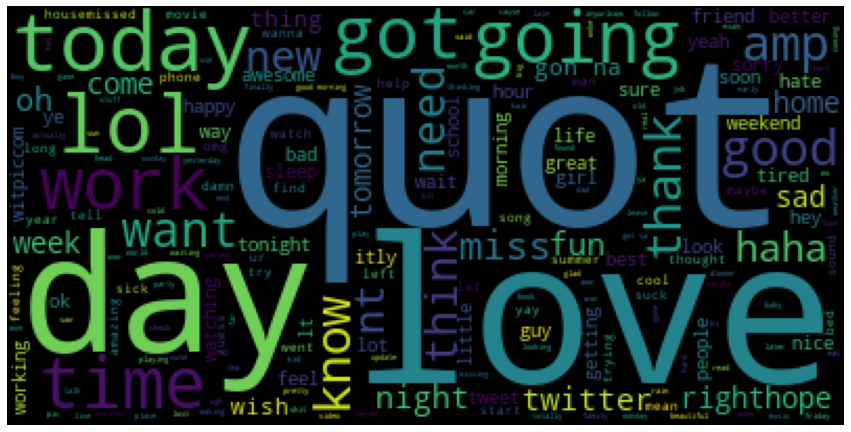

In [111]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud()
cloud = cloud.generate(texts)

plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off')

# Detecting Languages

In [112]:
# !pip install langdetect

     -------------------------------------- 981.5/981.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993221 sha256=5976d85ae3493aeffd52659805e5031d609fed21f86da5268b29be9f12a3da5d
  Stored in directory: c:\users\91807\appdata\local\pip\cache\wheels\13\c7\b0\79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [113]:
from langdetect import detect

In [114]:
detect('This is an English Text')

'en'

In [117]:
# detect('ନମସ୍କାର')
detect('नमस्ते')

'hi'

In [123]:
languages = []
for text in x_test_cleaned:
    try:
        if text != '':
            lang = detect(text)
    except:
        lang = 'error'
        print('This row throws the error', text)
        languages.append(lang)

In [125]:
np.unique(languages, return_counts= True)
lang

'en'